## Lecture 30: Monte Carlo Methods
(This is loosely based on Ch. 9 of the textbook)

Things covered in this notebook:
1. Random number generation
2. Monte Carlo Integration
3. Random Walks

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc

plt.rcParams['xtick.labelsize']=20      # change the tick label size for x axis
plt.rcParams['ytick.labelsize']=20      # change the tick label size for x axis
plt.rcParams['axes.linewidth']=1        # change the line width of the axis
plt.rcParams['xtick.major.width'] = 3   # change the tick line width of x axis
plt.rcParams['ytick.major.width'] = 3   # change the tick line width of y axis
rc('text', usetex=False)                # disable LaTeX rendering in plots
rc('font',**{'family':'DejaVu Sans'})   # set the font of the plot to be DejaVu Sans

### Random number generation

We already learned the basics of using Python to generate random numbers early on in the semester, so as a review, let's do the following exercises together.

1. generate a random number between 0 and 1
2. generate a random integer between 0 and 10
3. generate 10 numbers between 0 and 1

In [ ]:
import random as rand

x_1 =
x_2 =
x_3 =
print('Random Float between 0 and 1:\n', x_1)
print('Random Integer between 0 and 10:\n', x_2)
print('Ten Random Floats between 0 and 1:\n', [float("{0:0.3f}".format(i)) for i in x_3])

For Python, and I think this is the same with Matlab, if we could do things in an array format, it would be much faster than using a loop to generate a list, so let's generate many random numbers using `numpy.random`

1. Generate an array of 10 random numbers between 0 and 1.
2. Generate an array of (10, 2) random numbers between 0 and 1.
3. Generate an array of (4, 4) random integers between 0 and 10.

In [ ]:
x_4 =
x_5 =
x_6 =
np.set_printoptions(precision=3)
print(x_4)
print(x_5)
print(x_6)

### pseudo random number
All the random numbers generated by computer are not completely random, and they are called pseudo random.  If you want to know more about what this means, check out the relevant content in Ch. 9 of the textbook.
However, this pseudo randomness can also be used to our advantage.  Many times, when we are doing computation or running simulation using random numbers, we want to be able to completely reproduce the computation/simulation, so we want to know exactly what random numbers we generated.

We can control the sequence of random numbers by setting a random seed.

In [ ]:
np.random.seed(1)
print(np.random.randint(0, 10, size = (4, 4)))

In [ ]:
np.random.seed(1)
for i in range(10):
  print(np.random.randint(0, 10))

### Monte Carlo Integration

In the first lecture, I showed you the following figure.
<img src="https://upload.wikimedia.org/wikipedia/commons/8/84/Pi_30K.gif" width="350"/>

Let's use `numpy` to generate a list of random numbers, and compute the value of $\pi$ ourselves.

The reason why we can compute the value of $\pi$ is the following:

Assuming we are generating a set of random numbers $(x, y)$ within 0 and 1 uniformly, the chance of $x^2+y^2\leq1$ should be the area in red (a quarter of a circle with radius 1) divided by the area of a square with side 1.

So the estimation of $\pi$ would be
$\pi = 4\times p_\text{red}$

Let's first estimate $\pi$ using 100 random number pairs.


(0.0, 1.0)

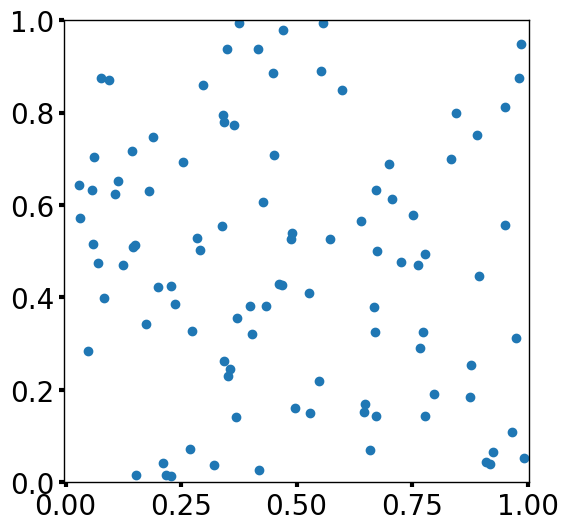

In [ ]:
x =
fig = plt.figure(figsize=(6, 6))
plt.scatter(x[:,0], x[:,1])
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)

In [ ]:
### compute the number of points falling within the circle


Let's now do 10000 random numbers

(0.0, 1.0)

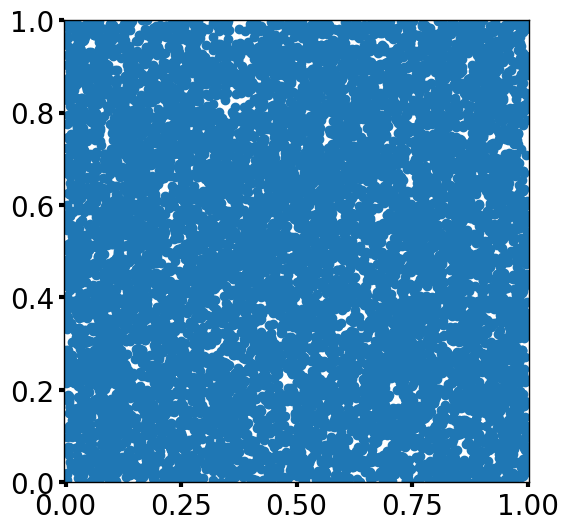

In [ ]:
x_big = np.random.rand(10000, 2)
fig = plt.figure(figsize=(6, 6))
plt.scatter(x_big[:,0], x_big[:,1])
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)

Now let's look at the accuracy of this method as a function of sample size

In [ ]:
pi_est_all = []
sample_size = [100, 500, 1000, 2500, 5000, 7500, 10000, 20000, 50000, 75000, 100000]
for i in sample_size:


In [ ]:
plt.scatter(sample_size, pi_est_all)
plt.axhline(y = np.pi, color = 'k')
plt.xscale('log')

### Random Walk (Ch. 9.3.1)
A **random walk** $W_t$ is defined on the real line by starting at $W_0 = 0$ and moving a step of lengths $i$ at each integer time $i$,where the $s_i$ are independent and identically distributed random variables. Here, we will assume each $s_i$ is $+1$ or $−1$ with equal probability $1/2$. **Discrete Brownian motion** is defined to be the random walk given by the sequence of accumulated steps
$$W_t =W_0 +s_1 +s_2 +···+s_t$$,
for $t = 0, 1, 2, \dots$

We can use a `for` loop to write a very simple discrete random walk.

Let's now use `numpy.choice` to write a faster version

In [ ]:
plt.scatter(range(100), W, marker = "_", s = 10, color = 'k')